In [1]:
# This is not a dataset, this is historical stock data from yahoo finance
# You need to select the dates which you want the stock data from and the market you want as well
# In this model, the market I chose was thr S&P 500


import pandas as pd
import warnings
warnings.filterwarnings('ignore')
import yfinance as yf


stock_ticker = ['AAPL','GOOG','T','MGM','IBM','^GSPC','TSLA','F','AMD','DIS','NEM','MCD']

sp500 = ['^GSPC']



start_date = '2020-10-10'

end_date = '2023-12-16'

risk_free_rate = 0.05

tickers = [sp500 + stock_ticker]

[*********************100%%**********************]  12 of 12 completed


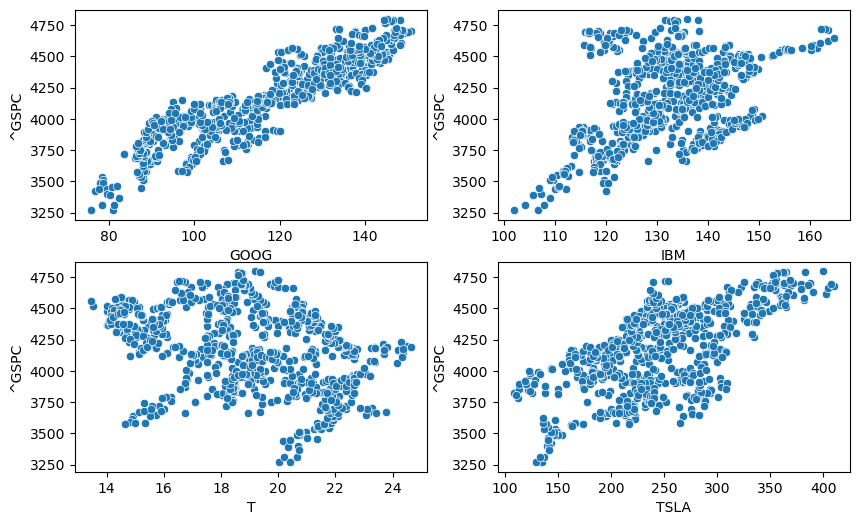

In [2]:
# For this Single index model, the library 'statsmodels', is needed.
# the dataframe(df), in this model is donwloading data from the chosen tickers
# And the S&P 500

df = yf.download(tickers=stock_ticker,start=start_date,end=end_date)['Close']


import seaborn as sns
import matplotlib.pyplot as plt


def basic_subplots(df):
    plt_,axs = plt.subplots(2,2,figsize=(10,6))
    sns.scatterplot(df,x='GOOG',y='^GSPC',ax=axs[0,0])
    sns.scatterplot(df,x='IBM',y='^GSPC',ax=axs[0,1])
    sns.scatterplot(df,x='T',y='^GSPC',ax=axs[1,0])
    sns.scatterplot(df,x='TSLA',y='^GSPC',ax=axs[1,1])
    plt.show()


basic_subplots(df)


In [3]:
# The user-defined function is going to make it so every single stock selected from above will be compared against 
# The S&P 500 and the single index model will be available for every asset compared against the market(S&P 500 in this case)

import statsmodels.api as sm


def run_single_index_model(stock_ticker, sp500, risk_free_rate):
    stock_data = df[stock_ticker].to_frame()
    sp500_data = df[sp500].to_frame()
    stock_data['Excess_Return'] = stock_data[stock_ticker] - risk_free_rate
    sp500_data['Excess_Return'] = sp500_data['^GSPC'] - risk_free_rate
    model = sm.OLS(endog=stock_data['Excess_Return'], exog=sm.add_constant(sp500_data['Excess_Return'])).fit()
    print(f'single index for each stock ticker{stock_data}')
    print(model.summary())
    plt.figure(figsize=(8,6))
    sns.scatterplot(x=sp500_data['Excess_Return'], y=stock_data['Excess_Return'], label=stock_ticker)
    sns.lineplot(x=sp500_data['Excess_Return'], y=model.fittedvalues, color='red', label='Security Market Line')
    plt.title(f'Single Index Model for {stock_ticker}')
    plt.xlabel('Market Excess Return')
    plt.ylabel(f'{stock_ticker} Excess Return')
    plt.legend()
    plt.show()

single index for each stock ticker                  AAPL  Excess_Return
Date                                 
2020-10-12  124.400002     124.350002
2020-10-13  121.099998     121.049998
2020-10-14  121.190002     121.140002
2020-10-15  120.709999     120.659999
2020-10-16  119.019997     118.969997
...                ...            ...
2023-12-11  193.179993     193.129993
2023-12-12  194.710007     194.660007
2023-12-13  197.960007     197.910007
2023-12-14  198.110001     198.060001
2023-12-15  197.570007     197.520007

[801 rows x 2 columns]
                            OLS Regression Results                            
Dep. Variable:          Excess_Return   R-squared:                       0.495
Model:                            OLS   Adj. R-squared:                  0.494
Method:                 Least Squares   F-statistic:                     783.3
Date:                Sat, 16 Dec 2023   Prob (F-statistic):          1.15e-120
Time:                        15:08:36   Log-Likelihoo

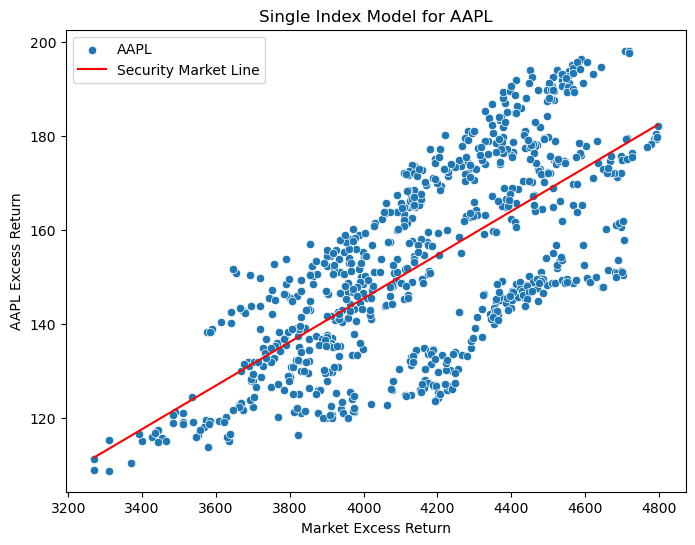

In [4]:
# Since the user-defined function above was defined, each company can be compared against the chosen market(S&P 500)
# first, Apple and the S&P 500. This is being done in one cell for better clarity. The user-defined function above will
# now do everything which was defined above.


run_single_index_model('AAPL','^GSPC', risk_free_rate)


single index for each stock ticker                  TSLA  Excess_Return
Date                                 
2020-10-12  147.433334     147.383334
2020-10-13  148.883331     148.833331
2020-10-14  153.766663     153.716663
2020-10-15  149.626663     149.576663
2020-10-16  146.556671     146.506671
...                ...            ...
2023-12-11  239.740005     239.690005
2023-12-12  237.009995     236.959995
2023-12-13  239.289993     239.239993
2023-12-14  251.050003     251.000003
2023-12-15  253.500000     253.450000

[801 rows x 2 columns]
                            OLS Regression Results                            
Dep. Variable:          Excess_Return   R-squared:                       0.379
Model:                            OLS   Adj. R-squared:                  0.378
Method:                 Least Squares   F-statistic:                     487.3
Date:                Sat, 16 Dec 2023   Prob (F-statistic):           1.11e-84
Time:                        15:09:41   Log-Likelihoo

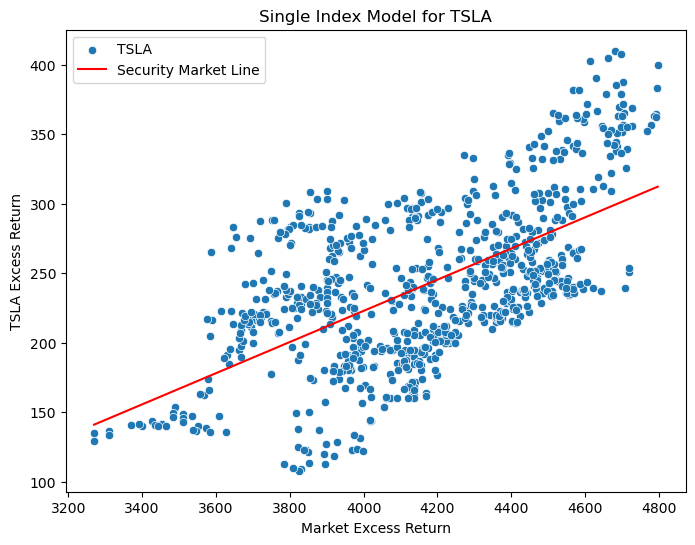

In [5]:
# Single index model for Tesla

run_single_index_model('TSLA','^GSPC', risk_free_rate)

single index for each stock ticker                   MCD  Excess_Return
Date                                 
2020-10-12  226.110001     226.060001
2020-10-13  227.350006     227.300006
2020-10-14  227.619995     227.569995
2020-10-15  229.639999     229.589999
2020-10-16  229.369995     229.319995
...                ...            ...
2023-12-11  289.149994     289.099994
2023-12-12  291.420013     291.370013
2023-12-13  295.929993     295.879993
2023-12-14  290.019989     289.969989
2023-12-15  287.269989     287.219989

[801 rows x 2 columns]
                            OLS Regression Results                            
Dep. Variable:          Excess_Return   R-squared:                       0.191
Model:                            OLS   Adj. R-squared:                  0.190
Method:                 Least Squares   F-statistic:                     188.9
Date:                Sat, 16 Dec 2023   Prob (F-statistic):           9.80e-39
Time:                        15:10:21   Log-Likelihoo

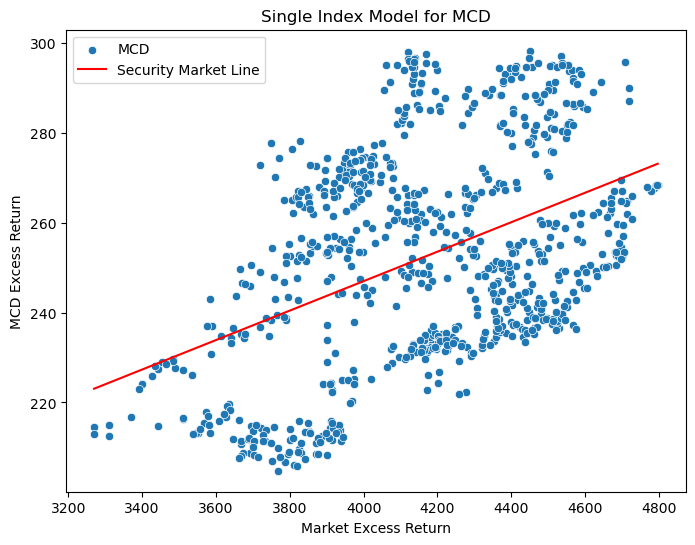

In [6]:
# Same thing but for McDonalds
run_single_index_model('MCD','^GSPC', risk_free_rate)

In [8]:
# Now, all stocks chosen will be returned together with the dependent variable being the S&P 500

X = df.drop(['^GSPC'],axis=1)
y = df[['^GSPC']]
model_full = sm.OLS(endog=y,exog=sm.add_constant(X)).fit()
print('\nSummary for All Tickers Together:')
print(model_full.summary())


Summary for All Tickers Together:
                            OLS Regression Results                            
Dep. Variable:                  ^GSPC   R-squared:                       0.977
Model:                            OLS   Adj. R-squared:                  0.977
Method:                 Least Squares   F-statistic:                     3074.
Date:                Sat, 16 Dec 2023   Prob (F-statistic):               0.00
Time:                        15:12:22   Log-Likelihood:                -4235.6
No. Observations:                 801   AIC:                             8495.
Df Residuals:                     789   BIC:                             8552.
Df Model:                          11                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const        694.